<a href="https://colab.research.google.com/github/nitinlodhi019/Churn_Prediction_WebApp/blob/main/new_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel("/content/Telco_customer_churn.xlsx")

In [ ]:
data.shape

(7043, 33)

In [ ]:
data

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [ ]:
df = data.copy()

====Value Count of Churn Values==== 
 Churn Value
0    5174
1    1869
Name: count, dtype: int64


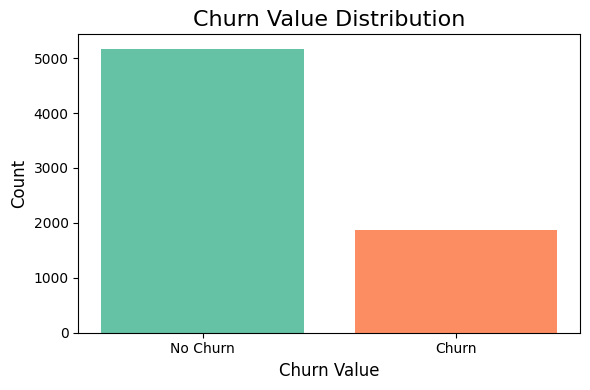

In [ ]:
import matplotlib.pyplot as plt

churn_counts = data['Churn Value'].value_counts()
print("====Value Count of Churn Values==== \n",churn_counts)
# Plot
plt.figure(figsize=(6, 4))
colors = ['#66c2a5', '#fc8d62']  # Custom attractive colors
plt.bar(churn_counts.index.astype(str), churn_counts.values, color=colors)

plt.title("Churn Value Distribution", fontsize=16)
plt.xlabel("Churn Value", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], labels=["No Churn", "Churn"], fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
def find_unique(df):
    unique_counts = {col: df[col].nunique() for col in df.columns}
    unique_df = pd.DataFrame(list(unique_counts.items()), columns=['Column', 'Unique Values'])
    return unique_df.sort_values(by='Unique Values', ascending=False).reset_index(drop=True)

find_unique(df)


,Column,Unique Values
0,CustomerID,7043
1,Total Charges,6531
2,CLTV,3438
3,Lat Long,1652
4,Latitude,1652
5,Zip Code,1652
6,Longitude,1651
7,Monthly Charges,1585
8,City,1129
9,Churn Score,85


In [ ]:
#Drop Irrelevant Columns
columns_to_drop = [
    'CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
    'Lat Long', 'Latitude', 'Longitude',
    'Churn Label', 'Churn Reason', 'Churn Score'
]

df_cleaned = df.drop(columns=columns_to_drop)

print("New shape of dataset:", df_cleaned.shape)
print("Remaining columns:", df_cleaned.columns.tolist())


New shape of dataset: (7043, 21)
Remaining columns: ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value', 'CLTV']


In [ ]:
#Create a new Column with old ones and remove old columns
service_cols = [
    'Online Security', 'Online Backup', 'Device Protection',
    'Tech Support', 'Streaming TV', 'Streaming Movies'
]

df_cleaned['TotalServicesOpted'] = df_cleaned[service_cols].apply(
    lambda row: sum(row == 'Yes'), axis=1
)

df_cleaned = df_cleaned.drop(columns=service_cols)
df_cleaned

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV,TotalServicesOpted
0,Male,No,No,No,2,Yes,No,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239,2
1,Female,No,No,Yes,2,Yes,No,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701,0
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,Month-to-month,Yes,Electronic check,99.65,820.5,1,5372,3
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003,4
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,5340,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0,5306,0
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,One year,Yes,Mailed check,84.80,1990.5,0,2140,5
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,One year,Yes,Credit card (automatic),103.20,7362.9,0,5560,4
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Month-to-month,Yes,Electronic check,29.60,346.45,0,2793,1


In [ ]:
def find_unique(df):
    unique_counts = {col: df[col].nunique() for col in df.columns}
    unique_df = pd.DataFrame(list(unique_counts.items()), columns=['Column', 'Unique Values'])
    return unique_df.sort_values(by='Unique Values', ascending=False).reset_index(drop=True)

find_unique(df_cleaned)


,Column,Unique Values
0,Total Charges,6531
1,CLTV,3438
2,Monthly Charges,1585
3,Tenure Months,73
4,TotalServicesOpted,7
5,Payment Method,4
6,Internet Service,3
7,Multiple Lines,3
8,Contract,3
9,Phone Service,2


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              7043 non-null   object 
 1   Senior Citizen      7043 non-null   object 
 2   Partner             7043 non-null   object 
 3   Dependents          7043 non-null   object 
 4   Tenure Months       7043 non-null   int64  
 5   Phone Service       7043 non-null   object 
 6   Multiple Lines      7043 non-null   object 
 7   Internet Service    7043 non-null   object 
 8   Contract            7043 non-null   object 
 9   Paperless Billing   7043 non-null   object 
 10  Payment Method      7043 non-null   object 
 11  Monthly Charges     7043 non-null   float64
 12  Total Charges       7043 non-null   object 
 13  Churn Value         7043 non-null   int64  
 14  CLTV                7043 non-null   int64  
 15  TotalServicesOpted  7043 non-null   int64  
dtypes: flo

In [ ]:
import numpy as np
#Convert Object to integer form
df_cleaned['Total Charges'] = pd.to_numeric(df_cleaned['Total Charges'].replace(" ", np.nan), errors='coerce')

#Fill mean if any value would be none
df_cleaned['Total Charges'] = df_cleaned['Total Charges'].fillna(df_cleaned['Total Charges'].mean())

print(df_cleaned['Total Charges'].dtype)


float64


<ipython-input-14-6c55f160ac8e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['Total Charges'] = pd.to_numeric(df_cleaned['Total Charges'].replace(" ", np.nan), errors='coerce')


In [ ]:
df_cleaned

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV,TotalServicesOpted
0,Male,No,No,No,2,Yes,No,DSL,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239,2
1,Female,No,No,Yes,2,Yes,No,Fiber optic,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701,0
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,Month-to-month,Yes,Electronic check,99.65,820.50,1,5372,3
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003,4
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5340,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,5306,0
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,One year,Yes,Mailed check,84.80,1990.50,0,2140,5
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,One year,Yes,Credit card (automatic),103.20,7362.90,0,5560,4
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Month-to-month,Yes,Electronic check,29.60,346.45,0,2793,1


In [ ]:
#Label Encoding on Binary Classes
from sklearn.preprocessing import LabelEncoder

binary_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']

le = LabelEncoder()
for col in binary_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

In [ ]:
#One Hot Encoding on Multi Classes
df_cleaned = pd.get_dummies(df_cleaned, columns=[
    'Multiple Lines', 'Internet Service', 'Contract', 'Payment Method'
], drop_first=True)

In [ ]:
import joblib
encoder_columns = df_cleaned.drop(columns=['Churn Value']).columns.tolist()
joblib.dump(encoder_columns, 'encoder_columns.pkl')

['encoder_columns.pkl']

In [ ]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Gender                                  7043 non-null   int64  
 1   Senior Citizen                          7043 non-null   int64  
 2   Partner                                 7043 non-null   int64  
 3   Dependents                              7043 non-null   int64  
 4   Tenure Months                           7043 non-null   int64  
 5   Phone Service                           7043 non-null   int64  
 6   Paperless Billing                       7043 non-null   int64  
 7   Monthly Charges                         7043 non-null   float64
 8   Total Charges                           7043 non-null   float64
 9   Churn Value                             7043 non-null   int64  
 10  CLTV                                    7043 non-null   int6

In [ ]:
# Convert all boolean columns to integers
bool_cols = df_cleaned.select_dtypes(include='bool').columns
df_cleaned[bool_cols] = df_cleaned[bool_cols].astype(int)

In [ ]:
df_cleaned

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Churn Value,...,TotalServicesOpted,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,0,0,2,1,1,53.85,108.15,1,...,2,0,0,0,0,0,0,0,0,1
1,0,0,0,1,2,1,1,70.70,151.65,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,8,1,1,99.65,820.50,1,...,3,0,1,1,0,0,0,0,1,0
3,0,0,1,1,28,1,1,104.80,3046.05,1,...,4,0,1,1,0,0,0,0,1,0
4,1,0,0,1,49,1,1,103.70,5036.30,1,...,4,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,1,1,21.15,1419.40,0,...,0,0,0,0,1,0,1,0,0,0
7039,1,0,1,1,24,1,1,84.80,1990.50,0,...,5,0,1,0,0,1,0,0,0,1
7040,0,0,1,1,72,1,1,103.20,7362.90,0,...,4,0,1,1,0,1,0,1,0,0
7041,0,0,1,1,11,0,1,29.60,346.45,0,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
#Apply Scaling on numerical Features
from sklearn.preprocessing import StandardScaler

num_cols = ['Monthly Charges', 'Total Charges', 'Tenure Months', 'CLTV', 'TotalServicesOpted']

scaler = StandardScaler()

df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])


In [ ]:
df_cleaned

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Churn Value,...,TotalServicesOpted,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,0,0,-1.236724,1,1,-0.362660,-0.960399,1,...,-0.020519,0,0,0,0,0,0,0,0,1
1,0,0,0,1,-1.236724,1,1,0.197365,-0.941193,1,...,-1.103033,0,0,1,0,0,0,0,1,0
2,0,0,0,1,-0.992402,1,1,1.159546,-0.645874,1,...,0.520738,0,1,1,0,0,0,0,1,0
3,0,0,1,1,-0.177995,1,1,1.330711,0.336779,1,...,1.061995,0,1,1,0,0,0,0,1,0
4,1,0,0,1,0.677133,1,1,1.294151,1.215539,1,...,1.061995,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,1.613701,1,1,-1.449476,-0.381440,0,...,-1.103033,0,0,0,1,0,1,0,0,0
7039,1,0,1,1,-0.340876,1,1,0.665992,-0.129281,0,...,1.603253,0,1,0,0,1,0,0,0,1
7040,0,0,1,1,1.613701,1,1,1.277533,2.242808,0,...,1.061995,0,1,1,0,1,0,1,0,0
7041,0,0,1,1,-0.870241,0,1,-1.168632,-0.855182,0,...,-0.561776,1,0,0,0,0,0,0,1,0


In [ ]:
X = df_cleaned.drop('Churn Value', axis=1)
y = df_cleaned['Churn Value']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [ ]:
#Best parameters for Logistic Regression: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

lr = LogisticRegression(max_iter=1000, C=100, penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7998580553584103


In [ ]:
import joblib

joblib.dump(lr, 'churn_model.pkl')


['churn_model.pkl']

In [ ]:
from tabulate import tabulate  # install with: pip install tabulate

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

# Store metrics
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1-Score": round(f1_score(y_test, y_pred), 4),
        "ROC AUC": round(roc_auc_score(y_test, y_prob), 4)
    })

# Create DataFrame and sort
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)

# Display clean tabulated table
print("\n📊 Model Comparison Table:\n")
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:55:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Model Comparison Table:

╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Model               │   Accuracy │   Precision │   Recall │   F1-Score │   ROC AUC │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Logistic Regression │     0.8013 │      0.6391 │   0.5775 │     0.6067 │    0.8496 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Naive Bayes         │     0.7417 │      0.5093 │   0.7353 │     0.6018 │    0.8254 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ XGBoost             │     0.7899 │      0.6161 │   0.5535 │     0.5831 │    0.8354 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Random Forest       │     0.7935 │      0.6326 │   0.5294 │     0.5764 │    0.8414 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ KNN          

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE only on training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Original training set shape:", y_train.value_counts().to_dict())
print("Resampled training set shape:", pd.Series(y_resampled).value_counts().to_dict())


Original training set shape: {0: 4139, 1: 1495}
Resampled training set shape: {0: 4139, 1: 4139}


In [ ]:
from tabulate import tabulate  # Install it if not installed: pip install tabulate

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

# Store metrics
results = []

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1-Score": round(f1_score(y_test, y_pred), 4),
        "ROC AUC": round(roc_auc_score(y_test, y_prob), 4)
    })

# Convert to DataFrame and sort by F1-Score
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)

# Show train set info
print("\n📊 Dataset Distribution:")
print("Original training set shape:", y_train.value_counts().to_dict())
print("Resampled training set shape:", pd.Series(y_resampled).value_counts().to_dict())

# Display neat comparison table
print("\n📋 Model Comparison Table:\n")
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:59:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Dataset Distribution:
Original training set shape: {0: 4139, 1: 1495}
Resampled training set shape: {0: 4139, 1: 4139}

📋 Model Comparison Table:

╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Model               │   Accuracy │   Precision │   Recall │   F1-Score │   ROC AUC │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Logistic Regression │     0.7502 │      0.5196 │   0.7807 │     0.6239 │    0.8442 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ SVM                 │     0.7381 │      0.5043 │   0.7888 │     0.6152 │    0.834  │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Random Forest       │     0.7779 │      0.5704 │   0.6604 │     0.6121 │    0.8342 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Naive Bayes         │     0.7317 │      0.4965 │   0.7487 │     0

In [ ]:
from sklearn.ensemble import StackingClassifier
base_learners = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('nb', GaussianNB()),
    ('svm', SVC(probability=True, random_state=42))
]

# Meta-model
meta_learner = LogisticRegression(max_iter=1000)

# Define stacking classifier
stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)
stack_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = stack_model.predict(X_test)
y_prob = stack_model.predict_proba(X_test)[:, 1]

# Results
results = {
    'Model': ['StackingClassifier'],
    'Accuracy': [accuracy_score(y_test, y_pred)],
    'Precision': [precision_score(y_test, y_pred)],
    'Recall': [recall_score(y_test, y_pred)],
    'F1-Score': [f1_score(y_test, y_pred)],
    'ROC AUC': [roc_auc_score(y_test, y_prob)]
}

# Show as DataFrame
results_df = pd.DataFrame(results)
print(results_df.round(4))

                Model  Accuracy  Precision  Recall  F1-Score  ROC AUC
0  StackingClassifier    0.7999     0.6484  0.5374    0.5877   0.8451


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
from tabulate import tabulate  # For clean output table

# Define helper function
def evaluate_model(name, model, X_test, y_test, results):
    y_pred = model.predict(X_test)
    y_prob = None
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)

    metrics = {
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1-Score": round(f1_score(y_test, y_pred), 4),
        "ROC AUC": round(roc_auc_score(y_test, y_prob), 4) if y_prob is not None else np.nan
    }
    results.append(metrics)

# --- 1. Define Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

results = []

# --- 2. Untuned Evaluation ---
print("\n🔍 Training and Evaluating Untuned Models...\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(name, model, X_test, y_test, results)

# --- 3. Logistic Regression Tuning ---
print("\n⚙️ Tuning Logistic Regression...")
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                              param_grid_lr, cv=5, scoring='f1', n_jobs=-1, verbose=0)
grid_search_lr.fit(X_train, y_train)
evaluate_model("Logistic Regression (Tuned)", grid_search_lr.best_estimator_, X_test, y_test, results)

# --- 4. Random Forest Tuning ---
print("⚙️ Tuning Random Forest...")
param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}
random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                      param_distributions=param_dist_rf, n_iter=50,
                                      cv=5, scoring='f1', random_state=42, n_jobs=-1, verbose=0)
random_search_rf.fit(X_train, y_train)
evaluate_model("Random Forest (Tuned)", random_search_rf.best_estimator_, X_test, y_test, results)

# --- 5. XGBoost Tuning ---
print("⚙️ Tuning XGBoost...")
param_dist_xgb = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5)
}
random_search_xgb = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
                                       param_distributions=param_dist_xgb, n_iter=50,
                                       cv=5, scoring='f1', random_state=42, n_jobs=-1, verbose=0)
random_search_xgb.fit(X_train, y_train)
evaluate_model("XGBoost (Tuned)", random_search_xgb.best_estimator_, X_test, y_test, results)

# --- 6. Display Results ---
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)

# Optional: Style the output for Jupyter or terminal
print("\n📊 Final Model Comparison Table\n")
print(tabulate(results_df, headers="keys", tablefmt="grid", showindex=False))

# You can also visualize or export this
# results_df.to_csv("model_comparison.csv", index=False)



🔍 Training and Evaluating Untuned Models...



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:34:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



⚙️ Tuning Logistic Regression...
⚙️ Tuning Random Forest...
⚙️ Tuning XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:50:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Final Model Comparison Table

+-----------------------------+------------+-------------+----------+------------+-----------+
| Model                       |   Accuracy |   Precision |   Recall |   F1-Score |   ROC AUC |
+=============================+============+=============+==========+============+===========+
| Logistic Regression         |     0.8013 |      0.6391 |   0.5775 |     0.6067 |    0.8496 |
+-----------------------------+------------+-------------+----------+------------+-----------+
| Logistic Regression (Tuned) |     0.7999 |      0.6361 |   0.5749 |     0.6039 |    0.85   |
+-----------------------------+------------+-------------+----------+------------+-----------+
| Naive Bayes                 |     0.7417 |      0.5093 |   0.7353 |     0.6018 |    0.8254 |
+-----------------------------+------------+-------------+----------+------------+-----------+
| Random Forest (Tuned)       |     0.8062 |      0.676  |   0.5187 |     0.587  |    0.8555 |
+----------------

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear'] # Start with 'rbf' as it's common for good performance
}
# Use GridSearchCV for SVM as it can be sensitive to parameter combinations
grid_search_svm = GridSearchCV(SVC(probability=True, random_state=42),
                               param_grid_svm, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_svm.fit(X_train, y_train)
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best F1-Score for SVM (CV):", round(grid_search_svm.best_score_, 4))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for SVM: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best F1-Score for SVM (CV): 0.6077


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
svm = SVC(C=10, gamma=0.01, kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svm, X_train, y_train, cv=kf, scoring='f1')
print("Cross-Validation F1-Scores for SVM:", scores)

Cross-Validation F1-Scores for SVM: [0.54356846 0.56846473 0.57575758 0.56439394 0.56321839]


#Files

In [ ]:
#joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
import pandas as pd

sample = {
    'Gender': ['Male'],
    'Senior Citizen': ['No'],
    'Partner': ['Yes'],
    'Dependents': ['No'],
    'Tenure Months': [12],
    'Phone Service': ['Yes'],
    'Multiple Lines': ['No'],
    'Internet Service': ['DSL'],
    'Contract': ['Month-to-month'],
    'Paperless Billing': ['Yes'],
    'Payment Method': ['Electronic check'],
    'Monthly Charges': [70.5],
    'Total Charges': [845.5],
    'CLTV': [3000],
    'TotalServicesOpted': [4]
}

df_example = pd.DataFrame(sample)
df_example.to_csv("example_input.csv", index=False)


In [ ]:
from IPython.display import FileLink
#FileLink('example_input.csv')


/content/example_input.csv